#Importing Dataset

In [204]:
#importing librairies
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split , KFold,GridSearchCV,RandomizedSearchCV , cross_val_score
from sklearn.metrics import  classification_report,confusion_matrix,f1_score,roc_auc_score,roc_curve,accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor , RandomForestClassifier
from sklearn.decomposition import PCA

%matplotlib inline

In [205]:
#from google.colab import files
#import io
#uploaded=files.upload()

In [206]:
#Last Dataset
df = pd.read_csv('Last_Dataset (1).csv')
df

,Unnamed: 0,price,marque,modele,Transmission,Carburant,Annee,Kilométrage,age
0,1,105000.0,Toyota,Prado VX,Manuelle,Diesel,2008,154000.0,14
1,2,58000.0,BMW,X3 2.0 D,Manuelle,Diesel,2006,125000.0,16
2,4,79000.0,Nissan,Qashqai TEKNA +,Automatique,Essence,2017,115000.0,5
3,5,95500.0,Audi,Q3 TFSI,Automatique,Essence,2017,100500.0,5
4,10,99000.0,Mercedes-Benz,Classe E coupé AMG,Automatique,Essence,2015,122000.0,7
...,...,...,...,...,...,...,...,...,...
8883,24789,11000.0,Volkswagen,Polo,Manuelle,Essence,1995,203000.0,27
8884,24861,45000.0,Ford,Focus,Manuelle,Essence,2017,190000.0,5
8885,24880,27000.0,BMW,Serie 1,Manuelle,Diesel,2013,340000.0,9
8886,24905,1000.0,Mercedes-Benz,Classe C,Automatique,Diesel,2018,50000.0,4


In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8888 entries, 0 to 8887
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    8888 non-null   int64  
 1   price         8888 non-null   float64
 2   marque        8888 non-null   object 
 3   modele        8888 non-null   object 
 4   Transmission  8888 non-null   object 
 5   Carburant     8888 non-null   object 
 6   Annee         8888 non-null   int64  
 7   Kilométrage   8888 non-null   float64
 8   age           8888 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 625.1+ KB


In [208]:
df.drop('Unnamed: 0'  , axis='columns', inplace=True)
df

,price,marque,modele,Transmission,Carburant,Annee,Kilométrage,age
0,105000.0,Toyota,Prado VX,Manuelle,Diesel,2008,154000.0,14
1,58000.0,BMW,X3 2.0 D,Manuelle,Diesel,2006,125000.0,16
2,79000.0,Nissan,Qashqai TEKNA +,Automatique,Essence,2017,115000.0,5
3,95500.0,Audi,Q3 TFSI,Automatique,Essence,2017,100500.0,5
4,99000.0,Mercedes-Benz,Classe E coupé AMG,Automatique,Essence,2015,122000.0,7
...,...,...,...,...,...,...,...,...
8883,11000.0,Volkswagen,Polo,Manuelle,Essence,1995,203000.0,27
8884,45000.0,Ford,Focus,Manuelle,Essence,2017,190000.0,5
8885,27000.0,BMW,Serie 1,Manuelle,Diesel,2013,340000.0,9
8886,1000.0,Mercedes-Benz,Classe C,Automatique,Diesel,2018,50000.0,4


In [209]:
df.drop_duplicates(keep='first' , inplace = True)
df.shape

(8866, 8)

In [210]:
df.isnull().sum()

price           0
marque          0
modele          0
Transmission    0
Carburant       0
Annee           0
Kilométrage     0
age             0
dtype: int64

##Visualising the Data

Here we will identify if some predictors directly have a strong association with the outcome variable price

Text(0, 0.5, 'Count of Cars')

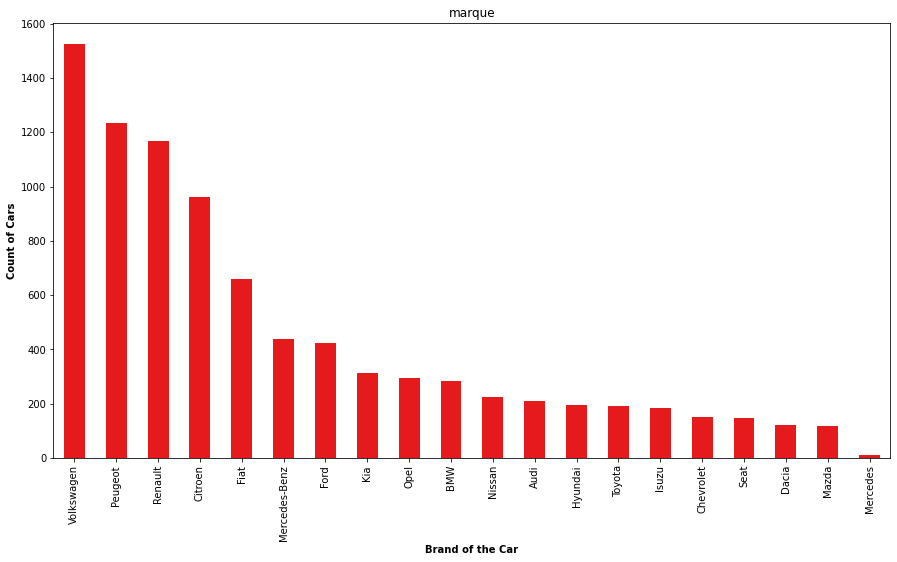

In [211]:
plt.rcParams['figure.figsize'] = [15,8]
ax=df['marque'].value_counts().plot(kind='bar',stacked=True, colormap = 'Set1')
ax.title.set_text('marque')
plt.xlabel("Brand of the Car",fontweight = 'bold')
plt.ylabel("Count of Cars",fontweight = 'bold')

<p>Peugot seems to be the most favoured cars.</p>
<p>LandRover seems to be the least favoured cars.</p>

Visualizing the distribution of car prices

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


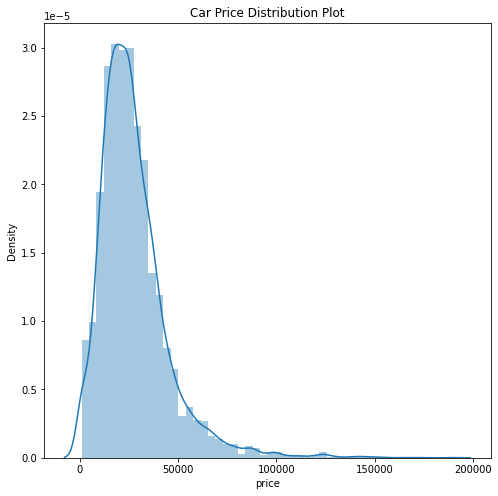

In [212]:
plt.figure(figsize=(8,8))

plt.title('Car Price Distribution Plot')
sns.distplot(df['price'])

In [213]:
# Segregation of Numerical and Categorical Variables/Columns

cat_col = df.select_dtypes(include=['object']).columns
num_col = df.select_dtypes(exclude=['object']).columns
df_cat = df[cat_col]
df_num = df[num_col]

Visualising Numeric Variables
Pairplot of all the numeric variables

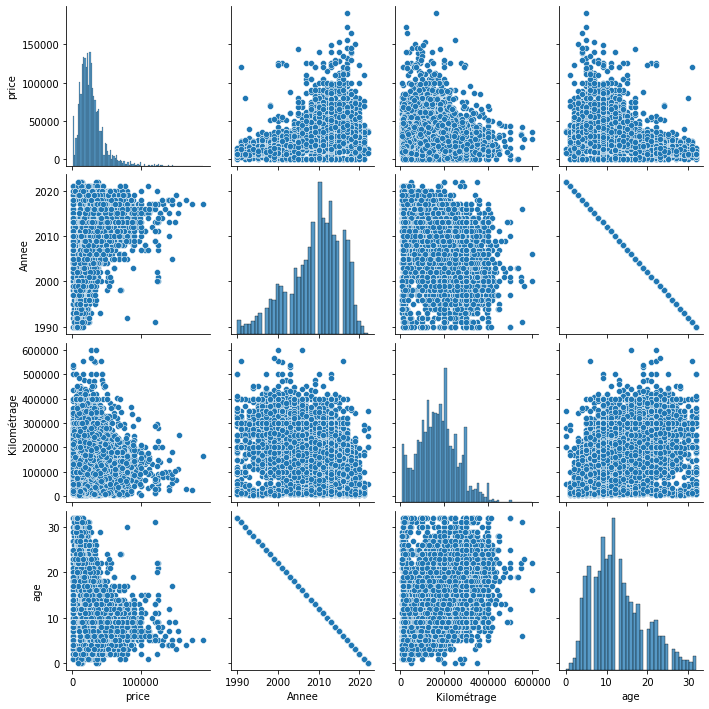

In [214]:
ax = sns.pairplot(df[num_col])

Visualising few more Categorical Variables
Boxplot of all the categorical variables



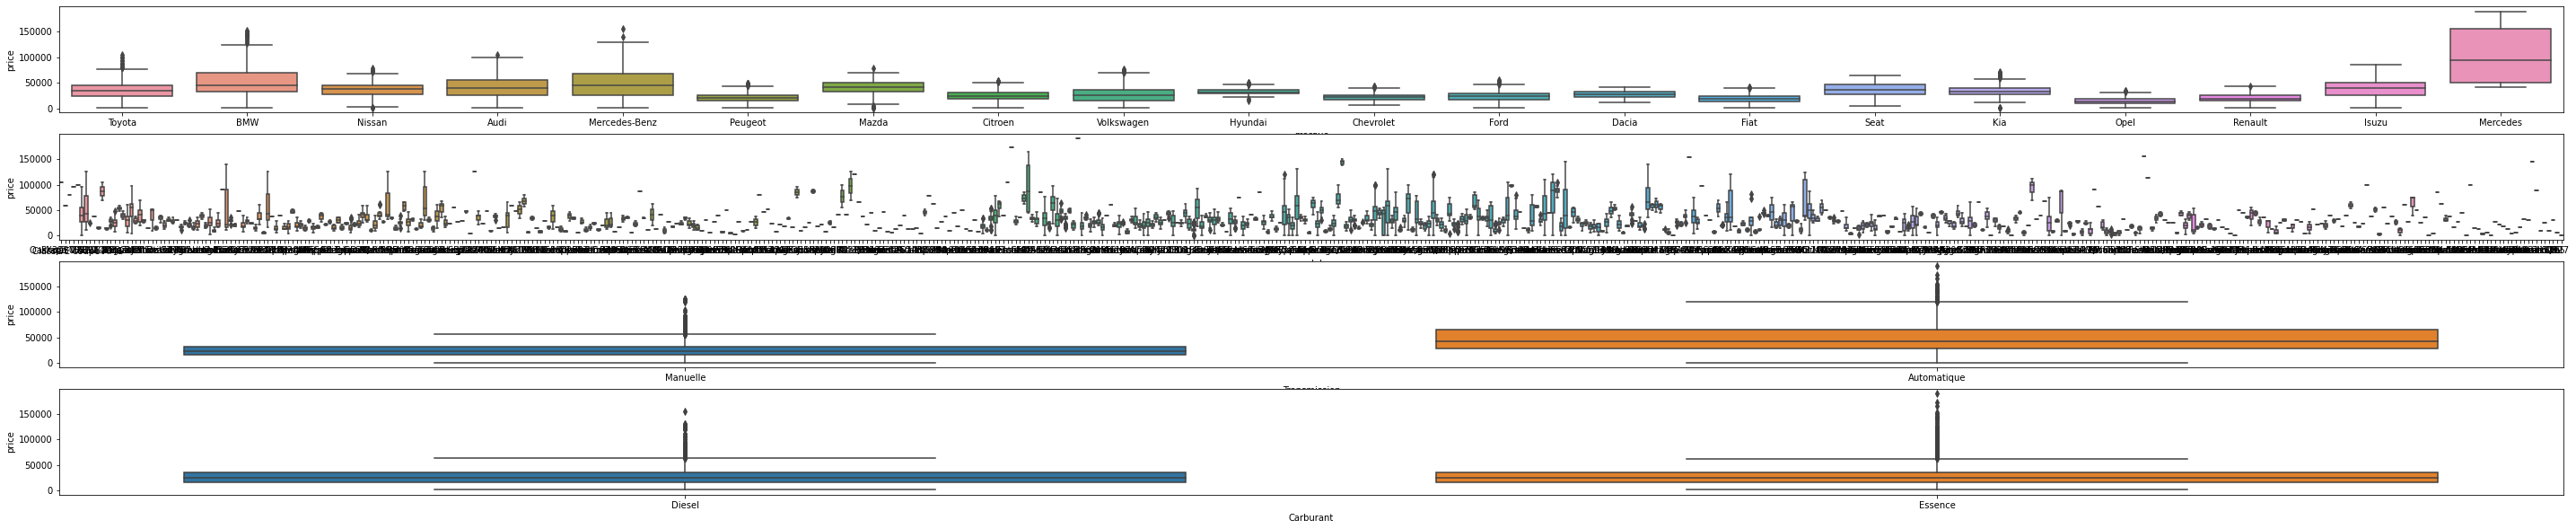

In [215]:
plt.figure(figsize=(50, 10))
plt.subplot(4,1,1)
sns.boxplot(x = 'marque', y = 'price', data = df)
plt.subplot(4,1,2)
sns.boxplot(x = 'modele', y = 'price', data = df)
plt.subplot(4,1,3)
sns.boxplot(x = 'Transmission', y = 'price', data = df)
plt.subplot(4,1,4)
sns.boxplot(x = 'Carburant', y = 'price', data = df)
plt.show()

The cars with fueltype as Essence are comparatively expensive than the cars with fueltype as Diesel.

[Text(0, 0.5, 'Frequency of marque'), Text(0.5, 0, 'marque')]

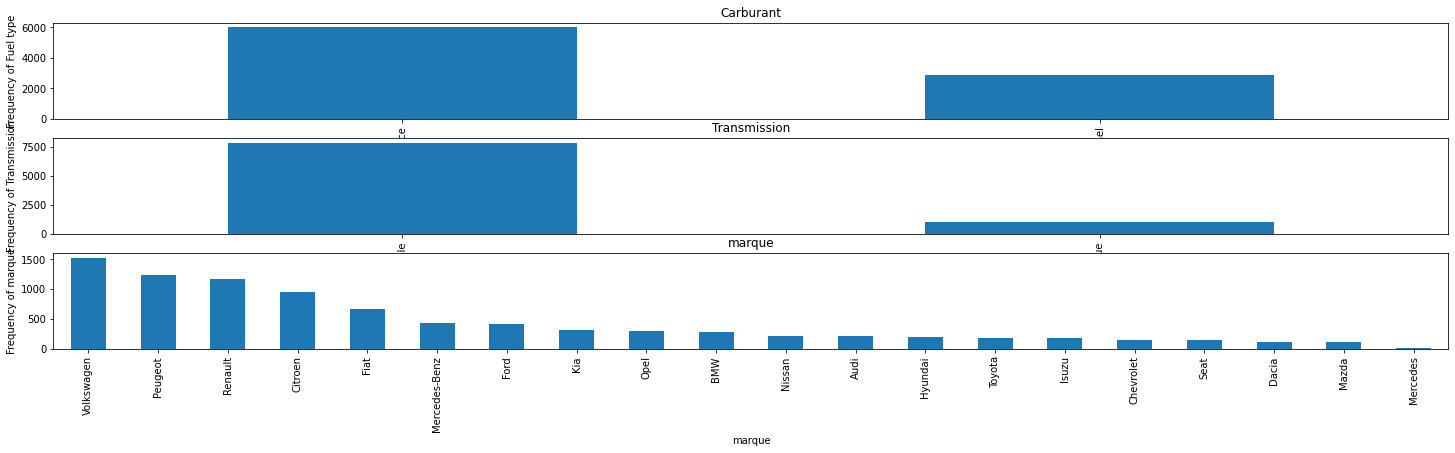

In [216]:
plt.figure(figsize=(25, 6))

plt.subplot(3,1,1)
plt1 = df['Carburant'].value_counts().plot(kind='bar')
plt.title('Carburant')
plt1.set(xlabel = 'Carburant', ylabel='Frequency of Fuel type')

plt.subplot(3,1,2)
plt1 = df['Transmission'].value_counts().plot(kind='bar')
plt.title('Transmission')
plt1.set(xlabel = 'Transmission', ylabel='Frequency of Transmission')

plt.subplot(3,1,3)
plt1 = df['marque'].value_counts().plot(kind='bar')
plt.title('marque')
plt1.set(xlabel = 'marque', ylabel='Frequency of marque')

<p>Number of "Essence "fueled cars are way more than "diesel" fueled cars.
<p>Number of Manuelle cars are way more than Automatique cars.
<p>Peugot is the most prefered car type.

Relationship between fuelsystem vs price with hue fueltype

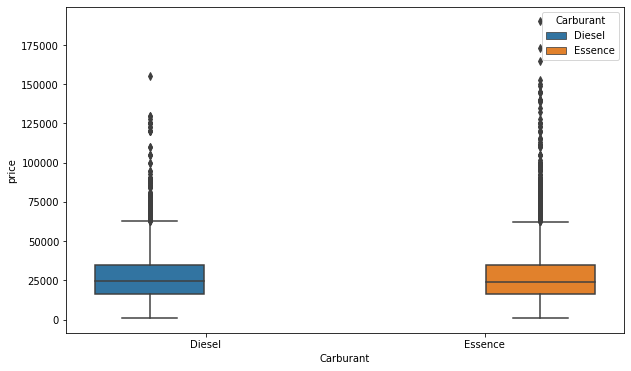

In [217]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'Carburant', y = 'price', hue = 'Carburant', data = df)
plt.show()

Relationship between Transmission vs price with hue Transmission

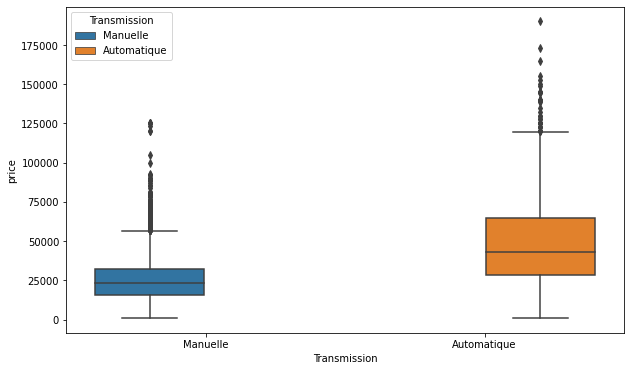

In [218]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'Transmission', y = 'price', hue = 'Transmission', data = df)
plt.show()

Relationship between brand vs price with hue fueltype

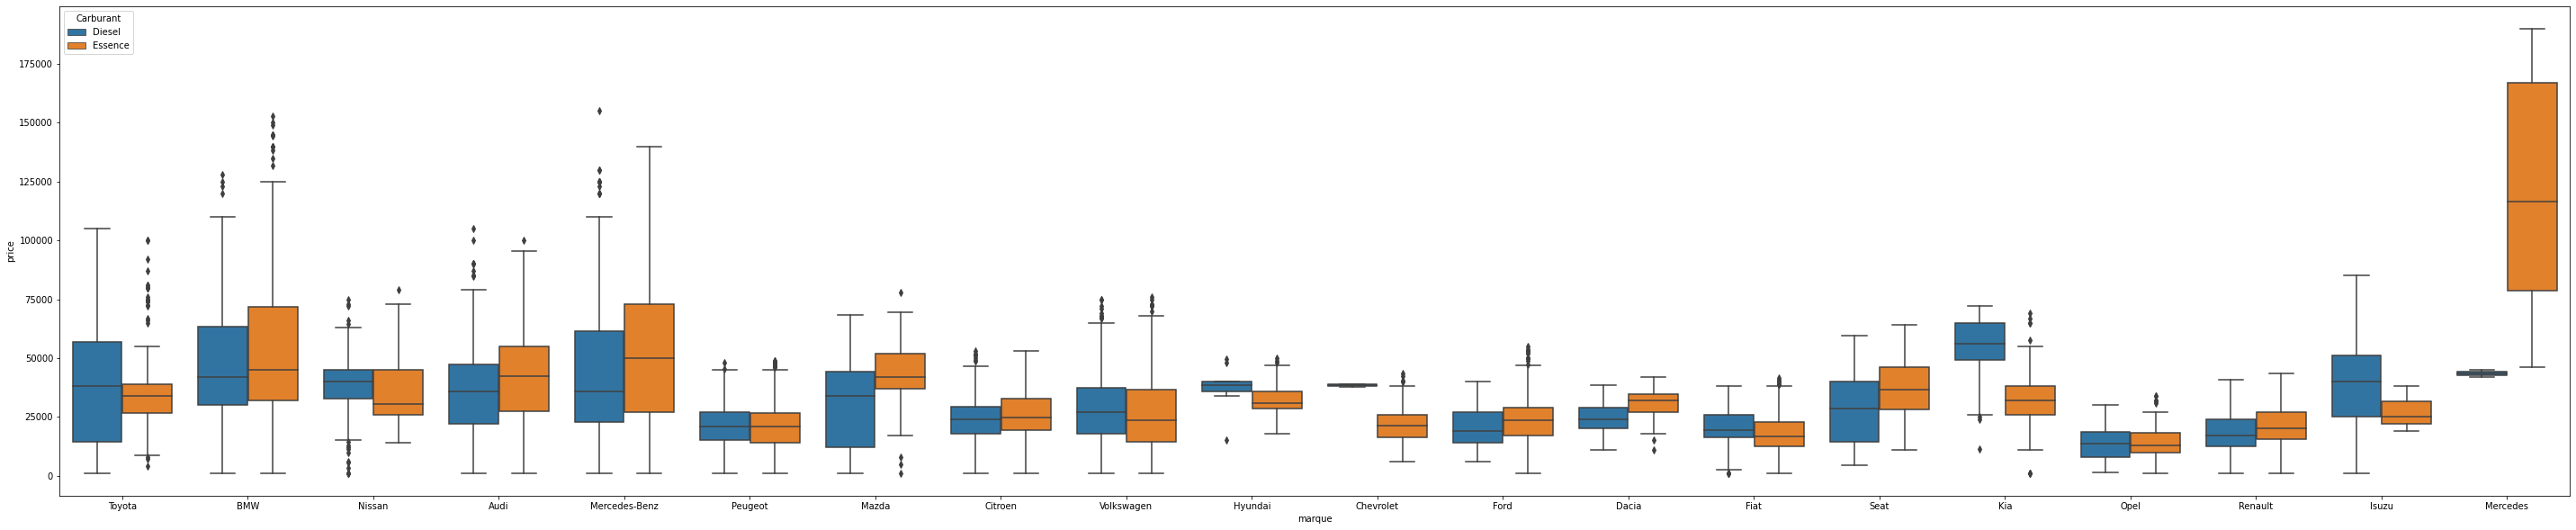

In [219]:
plt.figure(figsize = (50, 10))
sns.boxplot(x = 'marque', y = 'price', hue = 'Carburant', data = df)
plt.show()

Average Price

<Figure size 1440x432 with 0 Axes>

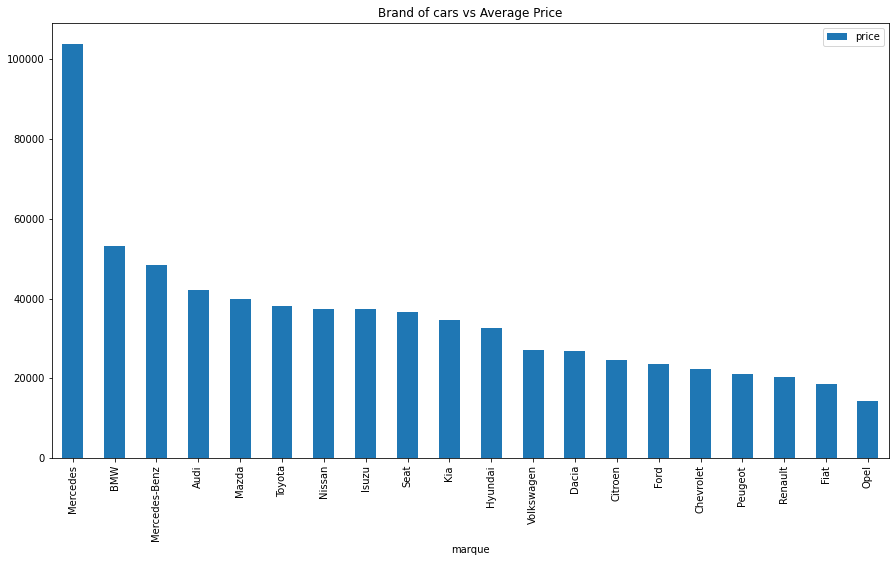

In [220]:
plt.figure(figsize=(20, 6))

df_autox = pd.DataFrame(df.groupby(['marque'])['price'].mean().sort_values(ascending = False))
df_autox.plot.bar()
plt.title('Brand of cars vs Average Price')
plt.show()

Mercedes ,Bmw and Mercedes-Benz seems to have the highest average price.

In [221]:
#Binning the Car Brands based on avg prices of each car Company.

df['price'] = df['price'].astype('int')
df_auto_temp = df.copy()
t = df_auto_temp.groupby(['marque'])['price'].mean()
df_auto_temp = df_auto_temp.merge(t.reset_index(), how='left',on='marque')
bins = [0,10000,100000,600000]
label =['Budget_Friendly','Medium_Range','TopNotch_Cars']
df['Cars_Category'] = pd.cut(df_auto_temp['price_y'],bins,right=False,labels=label)
df.head()

,price,marque,modele,Transmission,Carburant,Annee,Kilométrage,age,Cars_Category
0,105000,Toyota,Prado VX,Manuelle,Diesel,2008,154000.0,14,Medium_Range
1,58000,BMW,X3 2.0 D,Manuelle,Diesel,2006,125000.0,16,Medium_Range
2,79000,Nissan,Qashqai TEKNA +,Automatique,Essence,2017,115000.0,5,Medium_Range
3,95500,Audi,Q3 TFSI,Automatique,Essence,2017,100500.0,5,Medium_Range
4,99000,Mercedes-Benz,Classe E coupé AMG,Automatique,Essence,2015,122000.0,7,Medium_Range


Significant variables after Visualization

*   Marque
*   Transmission
*   Annee
*   Kilometrage
*   Cars_Gategory







In [222]:
sig_col = ['price','Cars_Category','marque','Transmission', 'Carburant','Annee','Kilométrage','age']
df = df[sig_col]

##Data Preparation

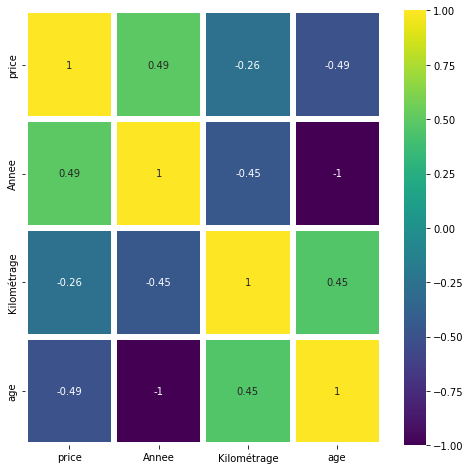

In [223]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr() , annot =True , cmap = "viridis" , linewidths = 5)

Dummy Variables
The variable Carburant has 2 Values : Essence and Diesel . We need to convert these values into integer. Similarly we need to convert the categorical variables to numeric.

In [224]:
#Converting Categorical to integer format 
def ref1(x):
  if x == "Manuelle":
    return 1
  elif x == "Automatique":
    return 0

df['Transmission'] = df['Transmission'].map(ref1)
df['Transmission'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


1    7870
0     996
Name: Transmission, dtype: int64

In [225]:
#Converting Categorical to integer format 
def ref2(x):
  if x == "Essence":
    return 1
  elif x == "Diesel":
    return 0

df['Carburant'] = df['Carburant'].map(ref2)
df['Carburant'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


1    5988
0    2878
Name: Carburant, dtype: int64

In [226]:
brands = pd.get_dummies(df['marque'])
df1 = pd.concat([df , brands] , axis = 1)

In [227]:
Cars_cat = pd.get_dummies(df['Cars_Category'])
df2 = pd.concat([df1 , Cars_cat] , axis = 1)

In [228]:
df2.head()

,price,Cars_Category,marque,Transmission,Carburant,Annee,Kilométrage,age,Audi,BMW,...,Nissan,Opel,Peugeot,Renault,Seat,Toyota,Volkswagen,Budget_Friendly,Medium_Range,TopNotch_Cars
0,105000,Medium_Range,Toyota,1,0,2008,154000.0,14,0,0,...,0,0,0,0,0,1,0,0,1,0
1,58000,Medium_Range,BMW,1,0,2006,125000.0,16,0,1,...,0,0,0,0,0,0,0,0,1,0
2,79000,Medium_Range,Nissan,0,1,2017,115000.0,5,0,0,...,1,0,0,0,0,0,0,0,1,0
3,95500,Medium_Range,Audi,0,1,2017,100500.0,5,1,0,...,0,0,0,0,0,0,0,0,1,0
4,99000,Medium_Range,Mercedes-Benz,0,1,2015,122000.0,7,0,0,...,0,0,0,0,0,0,0,0,1,0


Dividing into X and Y sets for the model building


In [229]:
y = df2['price']
x = df2.drop(['price','marque','Cars_Category'] , axis=1)

In [230]:
Xtrain , Xtest , ytrain , ytest = train_test_split(x[:3000] , y[:3000] , test_size=0.2 , random_state=42)

choice of 3000 value : 
*   it takes more time to train
*   to help to deploy the web site on heroku



In [231]:
from lightgbm import LGBMClassifier
from sklearn import metrics
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBClassifier
from xgboost.sklearn import XGBRegressor

from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor, RandomForestRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb

In [232]:
def Models(models):
    
    model = models
    
    
    model.fit(Xtrain,ytrain)
    y_pred = model.predict(Xtest)
    y_total = model.predict(X)
    
    print("\t\tError Table")
    print('Mean Absolute Error      : ', metrics.mean_absolute_error(ytest, y_pred))
    print('Mean Squared  Error      : ', metrics.mean_squared_error(ytest, y_pred))
    print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(ytest, y_pred)))
    print('Accuracy on Traing set   : ', model.score(Xtrain,ytrain))
    print('Accuracy on Testing set  : ', model.score(Xtest,ytest))
    return y_total, y

In [233]:
Acc = pd.DataFrame(index=None, columns=['model','Root Mean Squared  Error','Accuracy on Traing set','Accuracy on Testing set'])

In [234]:
regressors = [['DecisionTreeRegressor',DecisionTreeRegressor()],
              ['XGBRegressor', XGBRegressor()],
              ['RandomForestRegressor', RandomForestRegressor()],
              ['MLPRegressor',MLPRegressor()],
              ['AdaBoostRegressor',AdaBoostRegressor()],
              ['ExtraTreesRegressor',ExtraTreesRegressor()]]

for mod in regressors:
    name = mod[0]
    model = mod[1]
    model.fit(Xtrain,ytrain)
    y_pred = model.predict(Xtest)

    mae=mean_absolute_error(ytest, y_pred)
    RMSE = np.sqrt(metrics.mean_squared_error(ytest, y_pred))
    ATrS =  model.score(Xtrain,ytrain)
    ATeS = model.score(Xtest,ytest)
    
    Acc = Acc.append(pd.Series({'model':name, 'Root Mean Squared  Error': RMSE,'MAE':mae,'Accuracy on Traing set':ATrS,'Accuracy on Testing set':ATeS}),ignore_index=True )

[01:00:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [235]:
Acc.sort_values(by='Accuracy on Testing set')

,model,Root Mean Squared Error,Accuracy on Traing set,Accuracy on Testing set,MAE
3,MLPRegressor,17356.873990,0.102149,0.051249,12489.467546
4,AdaBoostRegressor,15838.227275,0.416759,0.210009,12681.923913
0,DecisionTreeRegressor,14672.799412,0.995925,0.321992,8784.311389
5,ExtraTreesRegressor,13279.944248,0.995917,0.444605,7621.378733
2,RandomForestRegressor,11993.351341,0.942359,0.547008,7108.987228
1,XGBRegressor,11265.991237,0.725182,0.600287,6867.966080


In [236]:
reg = LinearRegression()
reg.fit(Xtrain , ytrain)
# Predict
y_pred1 = reg.predict(Xtest)

In [237]:
# print the R-squared value for the model
print(round(reg.score(Xtrain , ytrain) , 2))

0.6


In [238]:
# print the R-squared value for the model
print(round(reg.score(Xtest , ytest) , 2))

0.56


In [239]:
# print the coefficients
print(reg.intercept_)
print(reg.coef_)

-1314276.2505218612
[-1.27710264e+04 -3.05257385e+03  6.81947561e+02 -2.35179174e-02
 -6.81947561e+02  5.73791352e+03  1.73829094e+04 -1.37308653e+04
 -9.73761709e+03 -1.32062136e+04 -1.29180220e+04 -9.68914820e+03
 -1.11464037e+04  6.91865380e+03 -8.00758454e+03 -9.48958490e+02
  6.77616875e+04  1.29631845e+04  2.02842048e+03 -7.17576423e+03
 -9.70357480e+03 -9.46928750e+03 -4.60099569e+03  9.11233144e+02
 -3.36956737e+03  0.00000000e+00  3.60706966e+03 -3.60706966e+03]


In [240]:
list(zip(x, reg.coef_))

[('Transmission', -12771.026389378172),
 ('Carburant', -3052.5738549821467),
 ('Annee', 681.9475609737186),
 ('Kilométrage', -0.023517917409294983),
 ('age', -681.9475609737727),
 ('Audi', 5737.913522172196),
 ('BMW', 17382.909443590273),
 ('Chevrolet', -13730.865277119605),
 ('Citroen', -9737.61708877336),
 ('Dacia', -13206.21360194666),
 ('Fiat', -12918.021965220081),
 ('Ford', -9689.14819825291),
 ('Hyundai', -11146.40366528698),
 ('Isuzu', 6918.65379572498),
 ('Kia', -8007.584540723338),
 ('Mazda', -948.9584898293431),
 ('Mercedes', 67761.68750516977),
 ('Mercedes-Benz', 12963.184527444408),
 ('Nissan', 2028.4204753180243),
 ('Opel', -7175.764231116172),
 ('Peugeot', -9703.57479900164),
 ('Renault', -9469.287501690136),
 ('Seat', -4600.995687748728),
 ('Toyota', 911.2331439566408),
 ('Volkswagen', -3369.567366667365),
 ('Budget_Friendly', 0.0),
 ('Medium_Range', 3607.069658899164),
 ('TopNotch_Cars', -3607.0696588991655)]

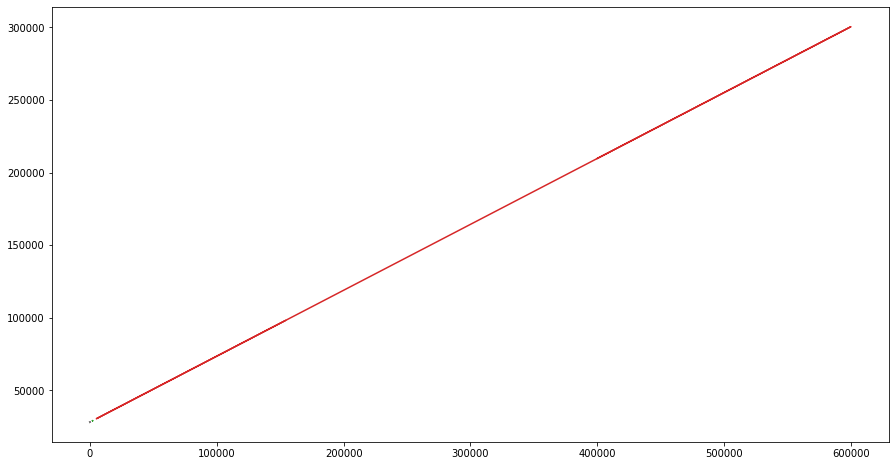

In [241]:
Xtrain = np.arange(2400).reshape(2400)

m, b = np.polyfit(Xtrain, ytrain , 1)

plt.plot(x, m*x + b)

In [242]:
print(m)

0.45395697334320534


In [243]:
print(b)

28158.125693808157


#Save the trained data as a Pickle